<h3> Hi this is ujjwal day 3  , learning to haldelling outliers </h3>

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 

In [6]:
df = pd.read_csv('placement.csv')

In [7]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\UJJWAL\AppData\Local\Temp\ipykernel_17284\3792736820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\UJJWAL\AppData\Local\Temp\ipykernel_17284\3792736820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


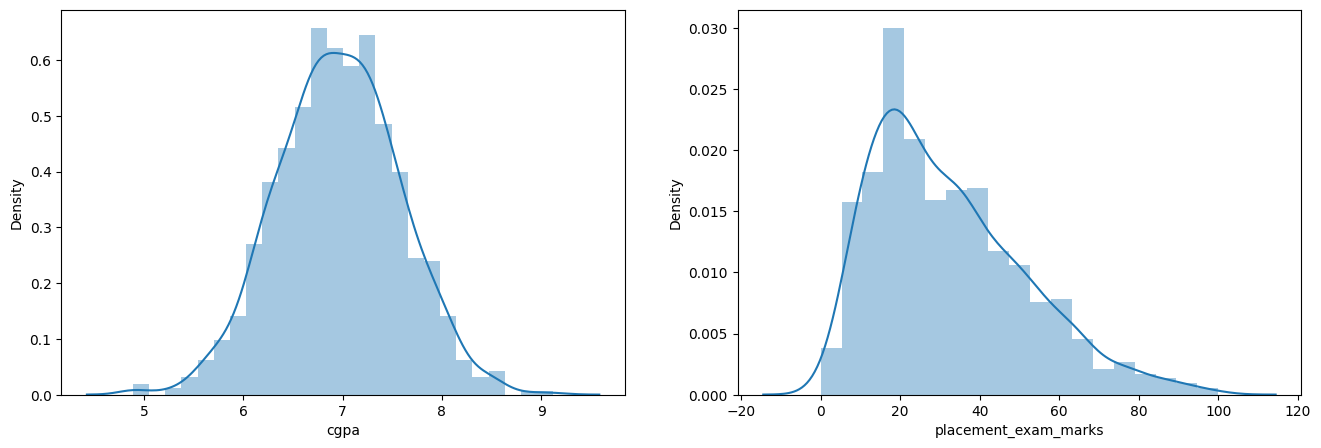

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [10]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [16]:
#formula q3 + 1.5 *IQR 
#formula min q1 - 1.5 * IQR 
#where IQR = 75$ - 25 %
percentile75 = df['placement_exam_marks'].quantile(0.75)
percentile25 = df['placement_exam_marks'].quantile(0.25) 
iqr = percentile75 - percentile25 
upper_limit = percentile75 + 1.5 * iqr 
lower_limit =  percentile25 -  1.5*iqr
upper_limit , lower_limit  , percentile75 , percentile25 , iqr

(84.5, -23.5, 44.0, 17.0, 27.0)

In [18]:
#now trimming 
trimed_df = df[(df['placement_exam_marks']  < upper_limit ) & ( df['placement_exam_marks'] > lower_limit)]

In [20]:
trimed_df.shape  , df.shape


((985, 3), (1000, 3))

In [23]:
#now capping 
capped_df = df.copy()
capped_df['placement_exam_marks'] = np.where(capped_df['placement_exam_marks'] > upper_limit  ,
                                             upper_limit ,
                                    np.where(capped_df['placement_exam_marks'] < lower_limit ,
                                    lower_limit , df['placement_exam_marks'])
                                            )

In [24]:
capped_df.shape , df.shape

((1000, 3), (1000, 3))

C:\Users\UJJWAL\AppData\Local\Temp\ipykernel_17284\375180807.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\UJJWAL\AppData\Local\Temp\ipykernel_17284\375180807.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(capped_df['placement_exam_marks'])


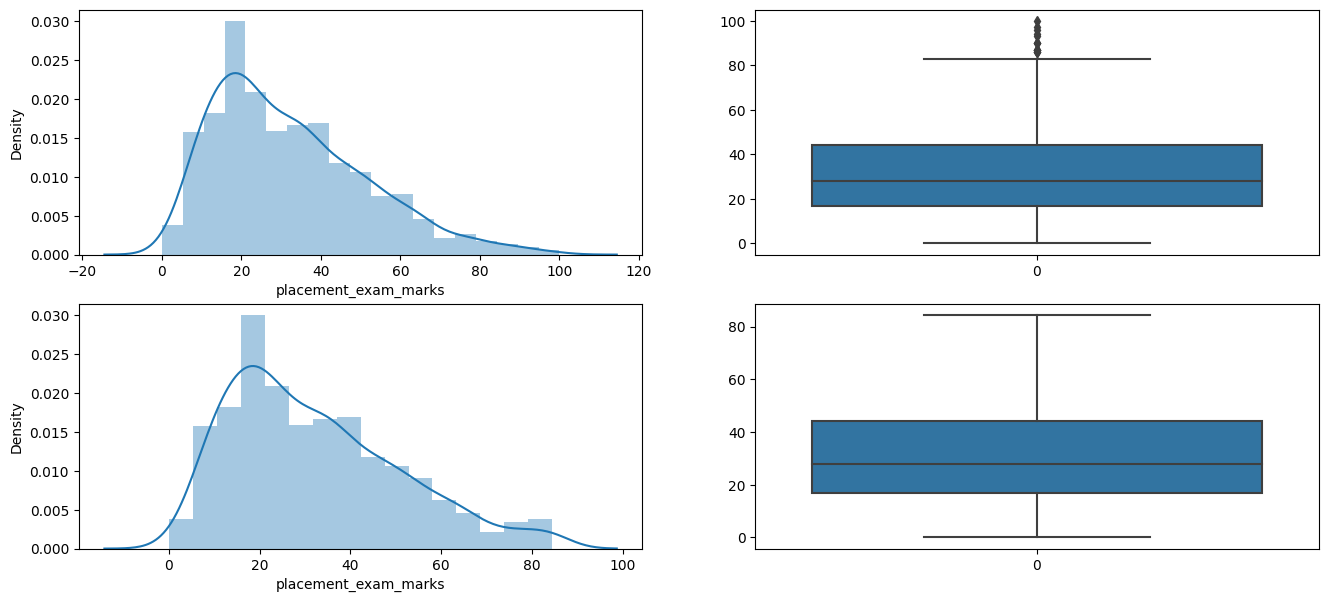

In [25]:
# Comparing

plt.figure(figsize=(16,7))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(capped_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(capped_df['placement_exam_marks'])

plt.show()

In [26]:
#we see that on start and end point of the data is raised up and on box plot outliners are removed completly